In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D
import tensorflow as tf
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.mnist.load_data()

1


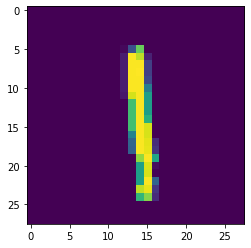

In [ ]:
image_index = 8
print(y_train_orig[image_index]) 
plt.imshow(x_train_orig[image_index])

In [ ]:
print(x_train_orig.shape)

x_train = x_train_orig.reshape(x_train_orig.shape[0], x_train_orig.shape[1], x_train_orig.shape[2], 1)
x_test = x_test_orig.reshape(x_test_orig.shape[0], x_test_orig.shape[1], x_test_orig.shape[2], 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of examples in training set =', x_train.shape[0])
print('Number of examples in test set =', x_test.shape[0])
y_train_orig.shape

(60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
Number of examples in training set = 60000
Number of examples in test set = 10000


(60000,)

In [ ]:
model = Sequential()

model.add(Conv2D(256, kernel_size=(3,3),strides=(1,1), input_shape=x_train.shape[1:],padding="same",activation=tf.nn.relu))


model.add(Conv2D(16, kernel_size=(1,1),strides=(1,1),padding="same",activation=tf.nn.relu))


model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1),padding="same",activation=tf.nn.relu))

model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))


# Flatten_Dense_Network
model.add(Flatten()) 
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2)) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2)) 
model.add(Dense(32, activation=tf.nn.relu))

#Softmax Layer with 10 neurons in output layer
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
# using ADAM optimizer
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train_orig,batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.2160 - accuracy: 0.9338
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0668 - accuracy: 0.9811
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0475 - accuracy: 0.9867
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0359 - accuracy: 0.9901
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0279 - accuracy: 0.9921


In [ ]:

Accuracy_test = model.evaluate(x_test, y_test_orig)
Accuracy_train = model.evaluate(x_train,y_train_orig)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - accuracy: 0.9973


In [ ]:
print("\nTraining set accuracy = "+str(Accuracy_train[1]))
print("\nTest set accuracy = "+str(Accuracy_test[1]))



Training set accuracy = 0.9973499774932861

Test set accuracy = 0.9923999905586243


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        4112      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        9280      
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               3211520   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              